In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re
from string import punctuation
import string

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Bidirectional, Lambda, BatchNormalization, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Flatten,Dropout, GlobalMaxPooling1D
from tensorflow.keras import layers, utils, callbacks, optimizers, regularizers
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
import tensorflow.keras.backend as K
from tqdm import tqdm

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
train = pd.read_excel('/content/gdrive/MyDrive/Tesis/0.001/Dataset jkt train6.xlsx', engine='openpyxl')
train = train.astype(str)
val = pd.read_excel('/content/gdrive/MyDrive/Tesis/0.001/Dataset jkt val6.xlsx', engine='openpyxl')
val = val.astype(str)
test = pd.read_excel("/content/gdrive/MyDrive/Tesis/0.001/Dataset test jkt fix6.xlsx", engine='openpyxl')
test = test.astype(str)

In [ ]:
train.head()

,Nomer,Perkara,Pihak,Link,Pasal,Kasus,Pasal_Pasangan,Isi,Kemiripan,question1,question2
0,2426,Pembunuhan,"Penuntut Umum:1.Z.M YENI, ROSALITA, SH, MH2.WI...",http://sipp.pn-jakartapusat.go.id/show_detil/V...,351.0,KETIGA :----------Bahwa ia Terdakwa REYHAN AZ...,170.0,(1) Barang siapa dengan terang-terangan dan de...,0,KETIGA Bahwa Terdakwa REYHAN AZINUDIN ARKHAN a...,Barang terang terangan tenaga kekerasan orang ...
1,2426,Pembunuhan,"Penuntut Umum:1.Z.M YENI, ROSALITA, SH, MH2.WI...",http://sipp.pn-jakartapusat.go.id/show_detil/V...,351.0,KETIGA :----------Bahwa ia Terdakwa REYHAN AZ...,363.0,(1) Diancam dengan pidana penjara paling lama ...,0,KETIGA Bahwa Terdakwa REYHAN AZINUDIN ARKHAN a...,Diancam pidana penjara tujuh pencurian ternak ...
2,2426,Pembunuhan,"Penuntut Umum:1.Z.M YENI, ROSALITA, SH, MH2.WI...",http://sipp.pn-jakartapusat.go.id/show_detil/V...,351.0,KETIGA :----------Bahwa ia Terdakwa REYHAN AZ...,362.0,"Barang siapa mengambil barang sesuatu, yang se...",0,KETIGA Bahwa Terdakwa REYHAN AZINUDIN ARKHAN a...,Barang mengambil barang kepunyaan orang maksud...
3,2426,Pembunuhan,"Penuntut Umum:1.Z.M YENI, ROSALITA, SH, MH2.WI...",http://sipp.pn-jakartapusat.go.id/show_detil/V...,351.0,KETIGA :----------Bahwa ia Terdakwa REYHAN AZ...,372.0,Barang siapa dengan sengaja dan melawan hukum ...,0,KETIGA Bahwa Terdakwa REYHAN AZINUDIN ARKHAN a...,Barang sengaja melawan hukum memiliki barang k...
4,2426,Pembunuhan,"Penuntut Umum:1.Z.M YENI, ROSALITA, SH, MH2.WI...",http://sipp.pn-jakartapusat.go.id/show_detil/V...,351.0,KETIGA :----------Bahwa ia Terdakwa REYHAN AZ...,303.0,(1) Diancam dengan pidana penjara paling lama ...,0,KETIGA Bahwa Terdakwa REYHAN AZINUDIN ARKHAN a...,Diancam pidana penjara sepuluh pidana denda pu...


In [ ]:
val.head()

,Nomer,Perkara,Pihak,Link,Pasal,Kasus,Pasal_Pasangan,Isi,Kemiripan,question1,question2
0,1602,Penggelapan,"Penuntut Umum:SILVI MULIANI LESTARI, SH., MHTe...",https://sipptmr.my.id/show_detil/WktQUmpWZk92U...,374.0,Dakwaan :---------Bahwa ia Terdakwa pada ha...,170.0,(1) Barang siapa dengan terang-terangan dan de...,0,Dakwaan Bahwa Terdakwa tanggal Desember sekira...,Barang terang terangan tenaga kekerasan orang ...
1,1602,Penggelapan,"Penuntut Umum:SILVI MULIANI LESTARI, SH., MHTe...",https://sipptmr.my.id/show_detil/WktQUmpWZk92U...,374.0,Dakwaan :---------Bahwa ia Terdakwa pada ha...,363.0,(1) Diancam dengan pidana penjara paling lama ...,0,Dakwaan Bahwa Terdakwa tanggal Desember sekira...,Diancam pidana penjara tujuh pencurian ternak ...
2,1602,Penggelapan,"Penuntut Umum:SILVI MULIANI LESTARI, SH., MHTe...",https://sipptmr.my.id/show_detil/WktQUmpWZk92U...,374.0,Dakwaan :---------Bahwa ia Terdakwa pada ha...,362.0,"Barang siapa mengambil barang sesuatu, yang se...",0,Dakwaan Bahwa Terdakwa tanggal Desember sekira...,Barang mengambil barang kepunyaan orang maksud...
3,1602,Penggelapan,"Penuntut Umum:SILVI MULIANI LESTARI, SH., MHTe...",https://sipptmr.my.id/show_detil/WktQUmpWZk92U...,374.0,Dakwaan :---------Bahwa ia Terdakwa pada ha...,372.0,Barang siapa dengan sengaja dan melawan hukum ...,0,Dakwaan Bahwa Terdakwa tanggal Desember sekira...,Barang sengaja melawan hukum memiliki barang k...
4,1602,Penggelapan,"Penuntut Umum:SILVI MULIANI LESTARI, SH., MHTe...",https://sipptmr.my.id/show_detil/WktQUmpWZk92U...,374.0,Dakwaan :---------Bahwa ia Terdakwa pada ha...,303.0,(1) Diancam dengan pidana penjara paling lama ...,0,Dakwaan Bahwa Terdakwa tanggal Desember sekira...,Diancam pidana penjara sepuluh pidana denda pu...


In [ ]:
test.head()

,Nomer,Perkara,Pihak,Link,Pasal,Kasus,Pasal_Pasangan,Isi,Kemiripan,question1,question2
0,4636,Pencurian,"Penuntut Umum:NULI NALI MURTI., SHTerdakwa:ROB...",https://sipp.pn-jakartaselatan.go.id/show_deti...,362.0,-------- Bahwa ia Terdakwa ROBBY TETRA CAHAYA ...,170.0,(1) Barang siapa dengan terang-terangan dan de...,0,Bahwa Terdakwa ROBBY TETRA CAHAYA Rabu tanggal...,Barang terang terangan tenaga kekerasan orang ...
1,4636,Pencurian,"Penuntut Umum:NULI NALI MURTI., SHTerdakwa:ROB...",https://sipp.pn-jakartaselatan.go.id/show_deti...,362.0,-------- Bahwa ia Terdakwa ROBBY TETRA CAHAYA ...,363.0,(1) Diancam dengan pidana penjara paling lama ...,0,Bahwa Terdakwa ROBBY TETRA CAHAYA Rabu tanggal...,Diancam pidana penjara tujuh pencurian ternak ...
2,4636,Pencurian,"Penuntut Umum:NULI NALI MURTI., SHTerdakwa:ROB...",https://sipp.pn-jakartaselatan.go.id/show_deti...,362.0,-------- Bahwa ia Terdakwa ROBBY TETRA CAHAYA ...,362.0,"Barang siapa mengambil barang sesuatu, yang se...",1,Bahwa Terdakwa ROBBY TETRA CAHAYA Rabu tanggal...,Barang mengambil barang kepunyaan orang maksud...
3,4636,Pencurian,"Penuntut Umum:NULI NALI MURTI., SHTerdakwa:ROB...",https://sipp.pn-jakartaselatan.go.id/show_deti...,362.0,-------- Bahwa ia Terdakwa ROBBY TETRA CAHAYA ...,372.0,Barang siapa dengan sengaja dan melawan hukum ...,0,Bahwa Terdakwa ROBBY TETRA CAHAYA Rabu tanggal...,Barang sengaja melawan hukum memiliki barang k...
4,4636,Pencurian,"Penuntut Umum:NULI NALI MURTI., SHTerdakwa:ROB...",https://sipp.pn-jakartaselatan.go.id/show_deti...,362.0,-------- Bahwa ia Terdakwa ROBBY TETRA CAHAYA ...,303.0,(1) Diancam dengan pidana penjara paling lama ...,0,Bahwa Terdakwa ROBBY TETRA CAHAYA Rabu tanggal...,Diancam pidana penjara sepuluh pidana denda pu...


# Preprocessing

In [ ]:
#train, test = train_test_split(data, stratify=data.is_duplicate, test_size=0.2)

In [ ]:
MAX_SEQUENCE_LENGTH = 30
EMBEDDING_DIM = 100

In [ ]:
corpus = []

feats = ['question1','question2']
for f in feats:
    train[f] = train[f].astype(str)
    val[f] = val[f].astype(str)
    test[f] = test[f].astype(str)
    corpus+=train[f].values.tolist()
    corpus+=val[f].values.tolist()
    corpus+=test[f].values.tolist()


tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
X_q1 = tokenizer.texts_to_sequences(train['question1'])
X_q2 = tokenizer.texts_to_sequences(train['question2'])

X_val_q1 = tokenizer.texts_to_sequences(val['question1'])
X_val_q2 = tokenizer.texts_to_sequences(val['question2'])

X_test_q1 = tokenizer.texts_to_sequences(test['question1'])
X_test_q2 = tokenizer.texts_to_sequences(test['question2'])


X_q1 = pad_sequences(X_q1, maxlen=MAX_SEQUENCE_LENGTH)
X_q2 = pad_sequences(X_q2, maxlen=MAX_SEQUENCE_LENGTH)
X_val_q1 = pad_sequences(X_val_q1, maxlen=MAX_SEQUENCE_LENGTH)
X_val_q2 = pad_sequences(X_val_q2, maxlen=MAX_SEQUENCE_LENGTH)
X_test_q1 = pad_sequences(X_test_q1, maxlen=MAX_SEQUENCE_LENGTH)
X_test_q2 = pad_sequences(X_test_q2, maxlen=MAX_SEQUENCE_LENGTH)

#y = train['Kemiripan'].values

word_index = tokenizer.word_index
nb_words = len(word_index)+1

# Word Embedding

In [ ]:
import re, nltk, gensim
# Loading pre-trained word vectors
def load_embedding(EMBEDDING_FILE,embedding_dim):
  word2vec_model = gensim.models.KeyedVectors.\
  load_word2vec_format(EMBEDDING_FILE, binary = True)
  w2v = dict(zip(word2vec_model.index_to_key,\
                 word2vec_model.vectors))

# This will be the embedding matrix
  embeddings = 1 * np.random.randn(len(word_index) \
                                   + 1, embedding_dim)
  embeddings[0] = 0  # So that the padding will be ignored


# Build the embedding matrix
  for word, index in word_index.items():
      if word in word2vec_model.index_to_key:
          embeddings[index] = word2vec_model.get_vector(word)
  return embeddings

embedding_dim=100
EMBEDDING_FILE = '/content/gdrive/MyDrive/Tesis/0.001/fasttext_model_jkt_wiki6.bin'

embeddings=load_embedding(EMBEDDING_FILE,embedding_dim)

In [ ]:
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
#X_train_q1,X_val_q1,X_train_q2,X_val_q2,y_train,y_val = train_test_split(X_q1,X_q2,y,train_size=0.8,random_state=1024)
print(X_q1.shape,X_val_q1.shape,X_test_q1.shape)
X_train = [X_q1,X_q2]
X_val = [X_val_q1,X_val_q2]
X_test = [X_test_q1,X_test_q2]

(82480, 30) (10300, 30) (10320, 30)


In [ ]:
y_train = train['Kemiripan'].values
y_val = val['Kemiripan'].values
y_test = test['Kemiripan'].values

In [ ]:
y_train = y_train.astype('float32')
y_val = y_val.astype('float32')
y_test = y_test.astype('float32')

## Euclidean distance and Cosine distance

In [ ]:
#Cosine distance
#def cosine_distance(output):
#  x, y= output[0],output[1]
#  x = K.l2_normalize(x, axis=-1)
#  y = K.l2_normalize(y, axis=-1)
#  return -K.mean(x * y, axis=-1, keepdims=True)

def cosine_distance(inputs):
    x, y = inputs
    x = tf.keras.backend.l2_normalize(x, axis=-1)
    y = tf.keras.backend.l2_normalize(y, axis=-1)
    return tf.keras.backend.sum(x * y, axis=-1, keepdims=True)

def euclidean_distance(output):
    x, y = output[0],output[1]
    return K.sqrt(K.sum(K.square(x - y), axis=1, keepdims=True))

In [ ]:
from tensorflow.keras.layers import Reshape
from tensorflow.keras.metrics import Precision, Recall

# BiLSTM

## DropOut 0.2

In [ ]:
# Define input shapes
input_q1 = Input(shape=(MAX_SEQUENCE_LENGTH,))
input_q2 = Input(shape=(MAX_SEQUENCE_LENGTH,))

# Define the embedding layer (using pre-trained Word2Vec embeddings)
embedding_layer = Embedding(input_dim=nb_words,
                            output_dim=EMBEDDING_DIM,
                            weights=[embeddings],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

# Apply the embedding layer to the input sequences
embedded_sequences_q1 = embedding_layer(input_q1)
embedded_sequences_q2 = embedding_layer(input_q2)

# Define the LSTM layers (you can experiment with the number of units)
lstm_units = 258
lstm_layer = Bidirectional(LSTM(lstm_units, return_sequences=False))

# Apply LSTM layers to the embedded sequences
x1 = lstm_layer(embedded_sequences_q1)
x1 = Dropout(0.2)(x1)
x2 = lstm_layer(embedded_sequences_q2)
x2 = Dropout(0.2)(x2)

cosine_similarity = Lambda(cosine_distance)([x1, x2])

# Add a dense layer for similarity scoring
#dense_layer = Dense(64, activation='relu')(cosine_similarity)

# Add an output layer with a single unit and sigmoid activation for binary classification
output = Dense(1, activation='sigmoid')(cosine_similarity)

# Define the Siamese model
model11 = Model(inputs=[input_q1, input_q2], outputs=output)

# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.05)
model11.compile(loss='binary_crossentropy',
                      optimizer=opt,
                      metrics=['accuracy', Precision(), Recall()])

# Display model summary
model11.summary()
utils.plot_model(model11, show_shapes=True, expand_nested=True)
cp11=ModelCheckpoint('/content/gdrive/MyDrive/Tesis/0.05/model_bilstm_f_train_20ep_02.hdf5',monitor='val_accuracy',verbose=1,save_best_only=False)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 30)]                 0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 30)]                 0         []                            
                                                                                                  
 embedding (Embedding)       (None, 30, 100)              2726000   ['input_1[0][0]',             
                                                                     'input_2[0][0]']             
                                                                                                  
 bidirectional (Bidirection  (None, 516)                  740976    ['embedding[0][0]',       

In [ ]:
history_f_bilstm = model11.fit(
    [X_q1, X_q2], y_train,
    validation_data=([X_val_q1, X_val_q2], y_val),
    batch_size=32,
    epochs=20,
    callbacks=[cp11]
)

Epoch 1/20
2577/2578 [============================>.] - ETA: 0s - loss: 0.2007 - accuracy: 0.9500 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 1: saving model to /content/gdrive/MyDrive/Tesis/0.05/model_bilstm_f_train_20ep_02.hdf5
2578/2578 [==============================] - 62s 18ms/step - loss: 0.2007 - accuracy: 0.9500 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.2154 - val_accuracy: 0.9500 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
   5/2578 [..............................] - ETA: 33s - loss: 0.2056 - accuracy: 0.9500 - precision: 0.0000e+00 - recall: 0.0000e+00

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2577/2578 [============================>.] - ETA: 0s - loss: 0.1992 - accuracy: 0.9500 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 2: saving model to /content/gdrive/MyDrive/Tesis/0.05/model_bilstm_f_train_20ep_02.hdf5
2578/2578 [==============================] - 44s 17ms/step - loss: 0.1992 - accuracy: 0.9500 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.2018 - val_accuracy: 0.9500 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/20
2576/2578 [============================>.] - ETA: 0s - loss: 0.1993 - accuracy: 0.9500 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 3: saving model to /content/gdrive/MyDrive/Tesis/0.05/model_bilstm_f_train_20ep_02.hdf5
2578/2578 [==============================] - 43s 17ms/step - loss: 0.1992 - accuracy: 0.9500 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.2170 - val_accuracy: 0.9500 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/20
2577/2578 [============================>.] - ETA: 0s - loss:

In [ ]:
y_pred_test = model11.predict([X_test_q1,X_test_q2])
threshold = 0.5
submission11 = test.copy()
submission11['Kemiripan'] = submission11['Kemiripan'].astype('float32')
submission11['predict'] = y_pred_test
submission11['predict'] = submission11['predict'].map(lambda x: 1.0 if x > threshold else 0.0)
submission11.to_csv('/content/gdrive/MyDrive/Tesis/0.05/submission_f_bilstm_02.csv',index=False)

323/323 [==============================] - 5s 8ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
print('Model Metrics for FastText+BiLSTM 20 Epoch 0.2')
print('---------------------------')
print(classification_report(submission11['Kemiripan'],submission11['predict']))
print('---------------------------')

Model Metrics for FastText+BiLSTM 20 Epoch 0.2
---------------------------
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      9804
         1.0       0.00      0.00      0.00       516

    accuracy                           0.95     10320
   macro avg       0.47      0.50      0.49     10320
weighted avg       0.90      0.95      0.93     10320

---------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Assign values to Accuracy column based on conditions
submission11['Accuracy'] = (submission11['Kemiripan'] == submission11['predict']).astype(int)

# Calculate overall accuracy
overall_accuracy = submission11['Accuracy'].mean()

print("Overall Accuracy:", overall_accuracy)

Overall Accuracy: 0.95


In [ ]:
submission11 = pd.read_csv('/content/gdrive/MyDrive/Tesis/0.05/submission_f_bilstm_02.csv')
submission11 = submission11.astype(str)

## DropOut 0.3

In [ ]:
# Define input shapes
input_q1 = Input(shape=(MAX_SEQUENCE_LENGTH,))
input_q2 = Input(shape=(MAX_SEQUENCE_LENGTH,))

# Define the embedding layer (using pre-trained Word2Vec embeddings)
embedding_layer = Embedding(input_dim=nb_words,
                            output_dim=EMBEDDING_DIM,
                            weights=[embeddings],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

# Apply the embedding layer to the input sequences
embedded_sequences_q1 = embedding_layer(input_q1)
embedded_sequences_q2 = embedding_layer(input_q2)

# Define the LSTM layers (you can experiment with the number of units)
lstm_units = 258
lstm_layer = Bidirectional(LSTM(lstm_units, return_sequences=False))

# Apply LSTM layers to the embedded sequences
x1 = lstm_layer(embedded_sequences_q1)
x1 = Dropout(0.3)(x1)
x2 = lstm_layer(embedded_sequences_q2)
x2 = Dropout(0.3)(x2)

cosine_similarity = Lambda(cosine_distance)([x1, x2])

# Add a dense layer for similarity scoring
#dense_layer = Dense(64, activation='relu')(cosine_similarity)

# Add an output layer with a single unit and sigmoid activation for binary classification
output = Dense(1, activation='sigmoid')(cosine_similarity)

# Define the Siamese model
model12 = Model(inputs=[input_q1, input_q2], outputs=output)

# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.05)
model12.compile(loss='binary_crossentropy',
                      optimizer=opt,
                      metrics=['accuracy', Precision(), Recall()])

# Display model summary
model12.summary()
utils.plot_model(model12, show_shapes=True, expand_nested=True)
cp12=ModelCheckpoint('/content/gdrive/MyDrive/Tesis/0.05/model_bilstm_f_train_20ep_03.hdf5',monitor='val_accuracy',verbose=1,save_best_only=False)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 30)]                 0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 30)]                 0         []                            
                                                                                                  
 embedding_1 (Embedding)     (None, 30, 100)              2726000   ['input_3[0][0]',             
                                                                     'input_4[0][0]']             
                                                                                                  
 bidirectional_1 (Bidirecti  (None, 516)                  740976    ['embedding_1[0][0]',   

In [ ]:
history_f_bilstm = model12.fit(
    [X_q1, X_q2], y_train,
    validation_data=([X_val_q1, X_val_q2], y_val),
    batch_size=32,
    epochs=20,
    callbacks=[cp12]
)

Epoch 1/20
2577/2578 [============================>.] - ETA: 0s - loss: 0.1956 - accuracy: 0.9489 - precision_1: 0.0796 - recall_1: 0.0022
Epoch 1: saving model to /content/gdrive/MyDrive/Tesis/0.05/model_bilstm_f_train_20ep_03.hdf5
2578/2578 [==============================] - 59s 20ms/step - loss: 0.1956 - accuracy: 0.9488 - precision_1: 0.0796 - recall_1: 0.0022 - val_loss: 0.1904 - val_accuracy: 0.9500 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 2/20
   5/2578 [..............................] - ETA: 34s - loss: 0.2465 - accuracy: 0.9312 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2576/2578 [============================>.] - ETA: 0s - loss: 0.1907 - accuracy: 0.9500 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00
Epoch 2: saving model to /content/gdrive/MyDrive/Tesis/0.05/model_bilstm_f_train_20ep_03.hdf5
2578/2578 [==============================] - 45s 17ms/step - loss: 0.1906 - accuracy: 0.9500 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_loss: 0.2017 - val_accuracy: 0.9487 - val_precision_1: 0.2759 - val_recall_1: 0.0155
Epoch 3/20
2576/2578 [============================>.] - ETA: 0s - loss: 0.1893 - accuracy: 0.9500 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00
Epoch 3: saving model to /content/gdrive/MyDrive/Tesis/0.05/model_bilstm_f_train_20ep_03.hdf5
2578/2578 [==============================] - 43s 16ms/step - loss: 0.1893 - accuracy: 0.9500 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_loss: 0.1886 - val_accuracy: 0.9494 - val_precision_1: 0.2000 - val_recall_1: 0.0039
Epoch 4/20
2578/2578 [==============================] - ETA: 0s

In [ ]:
y_pred_test = model12.predict([X_test_q1,X_test_q2])
threshold = 0.5
submission12 = test.copy()
submission12['Kemiripan'] = submission12['Kemiripan'].astype('float32')
submission12['predict'] = y_pred_test
submission12['predict'] = submission12['predict'].map(lambda x: 1.0 if x > threshold else 0.0)
submission12.to_csv('/content/gdrive/MyDrive/Tesis/0.05/submission_f_bilstm_03.csv',index=False)

323/323 [==============================] - 4s 7ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
print('Model Metrics for FastText+BiLSTM 20 Epoch 0.3')
print('---------------------------')
print(classification_report(submission12['Kemiripan'],submission12['predict']))
print('---------------------------')

Model Metrics for FastText+BiLSTM 20 Epoch 0.3
---------------------------
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      9804
         1.0       0.39      0.05      0.09       516

    accuracy                           0.95     10320
   macro avg       0.67      0.52      0.53     10320
weighted avg       0.92      0.95      0.93     10320

---------------------------


In [ ]:
# Assign values to Accuracy column based on conditions
submission12['Accuracy'] = (submission12['Kemiripan'] == submission12['predict']).astype(int)

# Calculate overall accuracy
overall_accuracy = submission12['Accuracy'].mean()

print("Overall Accuracy:", overall_accuracy)

Overall Accuracy: 0.9486434108527132


In [ ]:
submission12 = pd.read_csv('/content/gdrive/MyDrive/Tesis/0.05/submission_f_bilstm_03.csv')
submission12 = submission12.astype(str)

## DropOut 0.5

In [ ]:
# Define input shapes
input_q1 = Input(shape=(MAX_SEQUENCE_LENGTH,))
input_q2 = Input(shape=(MAX_SEQUENCE_LENGTH,))

# Define the embedding layer (using pre-trained Word2Vec embeddings)
embedding_layer = Embedding(input_dim=nb_words,
                            output_dim=EMBEDDING_DIM,
                            weights=[embeddings],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

# Apply the embedding layer to the input sequences
embedded_sequences_q1 = embedding_layer(input_q1)
embedded_sequences_q2 = embedding_layer(input_q2)

# Define the LSTM layers (you can experiment with the number of units)
lstm_units = 258
lstm_layer = Bidirectional(LSTM(lstm_units, return_sequences=False))

# Apply LSTM layers to the embedded sequences
x1 = lstm_layer(embedded_sequences_q1)
x1 = Dropout(0.5)(x1)
x2 = lstm_layer(embedded_sequences_q2)
x2 = Dropout(0.5)(x2)

cosine_similarity = Lambda(cosine_distance)([x1, x2])

# Add a dense layer for similarity scoring
#dense_layer = Dense(64, activation='relu')(cosine_similarity)

# Add an output layer with a single unit and sigmoid activation for binary classification
output = Dense(1, activation='sigmoid')(cosine_similarity)

# Define the Siamese model
model13 = Model(inputs=[input_q1, input_q2], outputs=output)

# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.05)
model13.compile(loss='binary_crossentropy',
                      optimizer=opt,
                      metrics=['accuracy', Precision(), Recall()])

# Display model summary
model13.summary()
utils.plot_model(model13, show_shapes=True, expand_nested=True)
cp13=ModelCheckpoint('/content/gdrive/MyDrive/Tesis/0.05/model_bilstm_f_train_20ep_05.hdf5',monitor='val_accuracy',verbose=1,save_best_only=False)

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 30)]                 0         []                            
                                                                                                  
 input_6 (InputLayer)        [(None, 30)]                 0         []                            
                                                                                                  
 embedding_2 (Embedding)     (None, 30, 100)              2726000   ['input_5[0][0]',             
                                                                     'input_6[0][0]']             
                                                                                                  
 bidirectional_2 (Bidirecti  (None, 516)                  740976    ['embedding_2[0][0]',   

In [ ]:
history_f_bilstm = model13.fit(
    [X_q1, X_q2], y_train,
    validation_data=([X_val_q1, X_val_q2], y_val),
    batch_size=32,
    epochs=20,
    callbacks=[cp13]
)

Epoch 1/20
2577/2578 [============================>.] - ETA: 0s - loss: 0.1986 - accuracy: 0.9484 - precision_2: 0.0548 - recall_2: 0.0019
Epoch 1: saving model to /content/gdrive/MyDrive/Tesis/0.05/model_bilstm_f_train_20ep_05.hdf5
2578/2578 [==============================] - 58s 19ms/step - loss: 0.1986 - accuracy: 0.9484 - precision_2: 0.0548 - recall_2: 0.0019 - val_loss: 0.1961 - val_accuracy: 0.9500 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 2/20
   1/2578 [..............................] - ETA: 57s - loss: 0.3241 - accuracy: 0.9062 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2575/2578 [============================>.] - ETA: 0s - loss: 0.1946 - accuracy: 0.9500 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00
Epoch 2: saving model to /content/gdrive/MyDrive/Tesis/0.05/model_bilstm_f_train_20ep_05.hdf5
2578/2578 [==============================] - 44s 17ms/step - loss: 0.1946 - accuracy: 0.9500 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - val_loss: 0.1994 - val_accuracy: 0.9494 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 3/20
2576/2578 [============================>.] - ETA: 0s - loss: 0.1932 - accuracy: 0.9500 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00
Epoch 3: saving model to /content/gdrive/MyDrive/Tesis/0.05/model_bilstm_f_train_20ep_05.hdf5
2578/2578 [==============================] - 42s 16ms/step - loss: 0.1932 - accuracy: 0.9500 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - val_loss: 0.1947 - val_accuracy: 0.9499 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 4/20
2575/2578 [=========================

In [ ]:
y_pred_test = model13.predict([X_test_q1,X_test_q2])
threshold = 0.5
submission13 = test.copy()
submission13['Kemiripan'] = submission13['Kemiripan'].astype('float32')
submission13['predict'] = y_pred_test
submission13['predict'] = submission13['predict'].map(lambda x: 1.0 if x > threshold else 0.0)
submission13.to_csv('/content/gdrive/MyDrive/Tesis/0.05/submission_f_bilstm_05.csv',index=False)

323/323 [==============================] - 4s 8ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
print('Model Metrics for FastText+BiLSTM 20 Epoch 0.5')
print('---------------------------')
print(classification_report(submission13['Kemiripan'],submission13['predict']))
print('---------------------------')

Model Metrics for FastText+BiLSTM 20 Epoch 0.5
---------------------------
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      9804
         1.0       0.46      0.06      0.10       516

    accuracy                           0.95     10320
   macro avg       0.71      0.53      0.54     10320
weighted avg       0.93      0.95      0.93     10320

---------------------------


In [ ]:
# Assign values to Accuracy column based on conditions
submission13['Accuracy'] = (submission13['Kemiripan'] == submission13['predict']).astype(int)

# Calculate overall accuracy
overall_accuracy = submission13['Accuracy'].mean()

print("Overall Accuracy:", overall_accuracy)

Overall Accuracy: 0.949515503875969


In [ ]:
submission13 = pd.read_csv('/content/gdrive/MyDrive/Tesis/0.05/submission_f_bilstm_05.csv')
submission13 = submission13.astype(str)

## DropOut 0.7

In [ ]:
# Define input shapes
input_q1 = Input(shape=(MAX_SEQUENCE_LENGTH,))
input_q2 = Input(shape=(MAX_SEQUENCE_LENGTH,))

# Define the embedding layer (using pre-trained Word2Vec embeddings)
embedding_layer = Embedding(input_dim=nb_words,
                            output_dim=EMBEDDING_DIM,
                            weights=[embeddings],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

# Apply the embedding layer to the input sequences
embedded_sequences_q1 = embedding_layer(input_q1)
embedded_sequences_q2 = embedding_layer(input_q2)

# Define the LSTM layers (you can experiment with the number of units)
lstm_units = 258
lstm_layer = Bidirectional(LSTM(lstm_units, return_sequences=False))

# Apply LSTM layers to the embedded sequences
x1 = lstm_layer(embedded_sequences_q1)
x1 = Dropout(0.7)(x1)
x2 = lstm_layer(embedded_sequences_q2)
x2 = Dropout(0.7)(x2)

cosine_similarity = Lambda(cosine_distance)([x1, x2])

# Add a dense layer for similarity scoring
#dense_layer = Dense(64, activation='relu')(cosine_similarity)

# Add an output layer with a single unit and sigmoid activation for binary classification
output = Dense(1, activation='sigmoid')(cosine_similarity)

# Define the Siamese model
model14 = Model(inputs=[input_q1, input_q2], outputs=output)

# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.05)
model14.compile(loss='binary_crossentropy',
                      optimizer=opt,
                      metrics=['accuracy', Precision(), Recall()])

# Display model summary
model14.summary()
utils.plot_model(model14, show_shapes=True, expand_nested=True)
cp14=ModelCheckpoint('/content/gdrive/MyDrive/Tesis/0.05/model_bilstm_f_train_20ep_07.hdf5',monitor='val_accuracy',verbose=1,save_best_only=False)

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 30)]                 0         []                            
                                                                                                  
 input_8 (InputLayer)        [(None, 30)]                 0         []                            
                                                                                                  
 embedding_3 (Embedding)     (None, 30, 100)              2726000   ['input_7[0][0]',             
                                                                     'input_8[0][0]']             
                                                                                                  
 bidirectional_3 (Bidirecti  (None, 516)                  740976    ['embedding_3[0][0]',   

In [ ]:
history_f_bilstm = model14.fit(
    [X_q1, X_q2], y_train,
    validation_data=([X_val_q1, X_val_q2], y_val),
    batch_size=32,
    epochs=20,
    callbacks=[cp14]
)

Epoch 1/20
2577/2578 [============================>.] - ETA: 0s - loss: 0.2021 - accuracy: 0.9500 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00
Epoch 1: saving model to /content/gdrive/MyDrive/Tesis/0.05/model_bilstm_f_train_20ep_07.hdf5
2578/2578 [==============================] - 51s 17ms/step - loss: 0.2021 - accuracy: 0.9500 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00 - val_loss: 0.1990 - val_accuracy: 0.9500 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 2/20
   5/2578 [..............................] - ETA: 32s - loss: 0.2164 - accuracy: 0.9438 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2576/2578 [============================>.] - ETA: 0s - loss: 0.1991 - accuracy: 0.9500 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00
Epoch 2: saving model to /content/gdrive/MyDrive/Tesis/0.05/model_bilstm_f_train_20ep_07.hdf5
2578/2578 [==============================] - 51s 20ms/step - loss: 0.1991 - accuracy: 0.9500 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00 - val_loss: 0.2016 - val_accuracy: 0.9500 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 3/20
2576/2578 [============================>.] - ETA: 0s - loss: 0.1993 - accuracy: 0.9500 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00
Epoch 3: saving model to /content/gdrive/MyDrive/Tesis/0.05/model_bilstm_f_train_20ep_07.hdf5
2578/2578 [==============================] - 43s 16ms/step - loss: 0.1992 - accuracy: 0.9500 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00 - val_loss: 0.1999 - val_accuracy: 0.9500 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 4/20
2578/2578 [=========================

In [ ]:
y_pred_test = model14.predict([X_test_q1,X_test_q2])
threshold = 0.5
submission14 = test.copy()
submission14['Kemiripan'] = submission14['Kemiripan'].astype('float32')
submission14['predict'] = y_pred_test
submission14['predict'] = submission14['predict'].map(lambda x: 1.0 if x > threshold else 0.0)
submission14.to_csv('/content/gdrive/MyDrive/Tesis/0.05/submission_f_bilstm_07.csv',index=False)

323/323 [==============================] - 5s 9ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
print('Model Metrics for FastText+BiLSTM 20 Epoch 0.7')
print('---------------------------')
print(classification_report(submission14['Kemiripan'],submission14['predict']))
print('---------------------------')

Model Metrics for FastText+BiLSTM 20 Epoch 0.7
---------------------------
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      9804
         1.0       0.00      0.00      0.00       516

    accuracy                           0.95     10320
   macro avg       0.47      0.50      0.49     10320
weighted avg       0.90      0.95      0.93     10320

---------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Assign values to Accuracy column based on conditions
submission14['Accuracy'] = (submission14['Kemiripan'] == submission14['predict']).astype(int)

# Calculate overall accuracy
overall_accuracy = submission14['Accuracy'].mean()

print("Overall Accuracy:", overall_accuracy)

Overall Accuracy: 0.95


In [ ]:
submission14 = pd.read_csv('/content/gdrive/MyDrive/Tesis/0.05/submission_f_bilstm_07.csv')
submission14 = submission14.astype(str)

# CNN

## Kernel 2

In [ ]:
# Define input shapes
input_q1 = Input(shape=(MAX_SEQUENCE_LENGTH,))
input_q2 = Input(shape=(MAX_SEQUENCE_LENGTH,))

# Define the embedding layer (using pre-trained Word2Vec embeddings)
embedding_layer = Embedding(input_dim=nb_words,
                            output_dim=EMBEDDING_DIM,
                            weights=[embeddings],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

# Apply the embedding layer to the input sequences
embedded_sequences_q1 = embedding_layer(input_q1)
embedded_sequences_q2 = embedding_layer(input_q2)

# Define Convolutional layers
num_filters = 258
kernel_size = 2
conv_layer = Conv1D(filters=num_filters, kernel_size=kernel_size, activation='relu')

# Apply Convolutional layers to the embedded sequences
x1 = conv_layer(embedded_sequences_q1)
x2 = conv_layer(embedded_sequences_q2)

# Apply Global Max Pooling to reduce the dimensionality
x1 = GlobalMaxPooling1D()(x1)
x2 = GlobalMaxPooling1D()(x2)

cosine_similarity = Lambda(cosine_distance)([x1, x2])

# Add a dense layer for similarity scoring
#dense_layer = Dense(64, activation='relu')(cosine_similarity)

# Add an output layer with a single unit and sigmoid activation for binary classification
output = Dense(1, activation='sigmoid')(cosine_similarity)

# Define the Siamese model
model21 = Model(inputs=[input_q1, input_q2], outputs=output)

# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.05)
model21.compile(loss='binary_crossentropy',
                      optimizer=opt,
                      metrics=['accuracy', Precision(), Recall()])

# Display model summary
model21.summary()
utils.plot_model(model21, show_shapes=True, expand_nested=True)
cp21=ModelCheckpoint('/content/gdrive/MyDrive/Tesis/0.05/model_cnn_f_train_20ep_2.hdf5',monitor='val_acc',verbose=1,save_best_only=False)

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, 30)]                 0         []                            
                                                                                                  
 input_10 (InputLayer)       [(None, 30)]                 0         []                            
                                                                                                  
 embedding_4 (Embedding)     (None, 30, 100)              2726000   ['input_9[0][0]',             
                                                                     'input_10[0][0]']            
                                                                                                  
 conv1d (Conv1D)             (None, 29, 258)              51858     ['embedding_4[0][0]',   

In [ ]:
history_f_cnn = model21.fit(
    [X_q1, X_q2], y_train,
    validation_data=([X_val_q1, X_val_q2], y_val),
    batch_size=32,
    epochs=20,
    callbacks=[cp21]
)

Epoch 1/20
2578/2578 [==============================] - ETA: 0s - loss: 0.1073 - accuracy: 0.9648 - precision_4: 0.7598 - recall_4: 0.4340
Epoch 1: saving model to /content/gdrive/MyDrive/Tesis/0.05/model_cnn_f_train_20ep_2.hdf5
2578/2578 [==============================] - 26s 7ms/step - loss: 0.1073 - accuracy: 0.9648 - precision_4: 0.7598 - recall_4: 0.4340 - val_loss: 0.0777 - val_accuracy: 0.9718 - val_precision_4: 0.8016 - val_recall_4: 0.5806
Epoch 2/20
   7/2578 [..............................] - ETA: 24s - loss: 0.0635 - accuracy: 0.9866 - precision_4: 0.8333 - recall_4: 0.7143

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2572/2578 [============================>.] - ETA: 0s - loss: 0.0714 - accuracy: 0.9741 - precision_4: 0.8291 - recall_4: 0.6067
Epoch 2: saving model to /content/gdrive/MyDrive/Tesis/0.05/model_cnn_f_train_20ep_2.hdf5
2578/2578 [==============================] - 18s 7ms/step - loss: 0.0714 - accuracy: 0.9741 - precision_4: 0.8288 - recall_4: 0.6067 - val_loss: 0.0697 - val_accuracy: 0.9756 - val_precision_4: 0.8529 - val_recall_4: 0.6194
Epoch 3/20
2571/2578 [============================>.] - ETA: 0s - loss: 0.0633 - accuracy: 0.9767 - precision_4: 0.8569 - recall_4: 0.6406
Epoch 3: saving model to /content/gdrive/MyDrive/Tesis/0.05/model_cnn_f_train_20ep_2.hdf5
2578/2578 [==============================] - 19s 7ms/step - loss: 0.0634 - accuracy: 0.9767 - precision_4: 0.8566 - recall_4: 0.6404 - val_loss: 0.0610 - val_accuracy: 0.9767 - val_precision_4: 0.8412 - val_recall_4: 0.6583
Epoch 4/20
2578/2578 [==============================] - ETA: 0s - loss: 0.0569 - accuracy: 0.9791 - preci

In [ ]:
y_pred_test = model21.predict([X_test_q1,X_test_q2])
threshold = 0.5
submission21 = test.copy()
submission21['Kemiripan'] = submission21['Kemiripan'].astype('float32')
submission21['predict'] = y_pred_test
submission21['predict'] = submission21['predict'].map(lambda x: 1.0 if x > threshold else 0.0)
submission21.to_csv('/content/gdrive/MyDrive/Tesis/0.05/submission_f_cnn_2.csv',index=False)

323/323 [==============================] - 1s 2ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
print('Model Metrics for FastText+CNN 20 Epoch 2')
print('---------------------------')
print(classification_report(submission21['Kemiripan'],submission21['predict']))
print('---------------------------')

Model Metrics for FastText+CNN 20 Epoch 2
---------------------------
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      9804
         1.0       0.81      0.79      0.80       516

    accuracy                           0.98     10320
   macro avg       0.90      0.89      0.89     10320
weighted avg       0.98      0.98      0.98     10320

---------------------------


In [ ]:
# Assign values to Accuracy column based on conditions
submission21['Accuracy'] = (submission21['Kemiripan'] == submission21['predict']).astype(int)

# Calculate overall accuracy
overall_accuracy = submission21['Accuracy'].mean()

print("Overall Accuracy:", overall_accuracy)

Overall Accuracy: 0.9802325581395349


In [ ]:
submission21 = pd.read_csv('/content/gdrive/MyDrive/Tesis/0.05/submission_f_cnn_2.csv')
submission21 = submission21.astype(str)

## Kernel 3

In [ ]:
# Define input shapes
input_q1 = Input(shape=(MAX_SEQUENCE_LENGTH,))
input_q2 = Input(shape=(MAX_SEQUENCE_LENGTH,))

# Define the embedding layer (using pre-trained Word2Vec embeddings)
embedding_layer = Embedding(input_dim=nb_words,
                            output_dim=EMBEDDING_DIM,
                            weights=[embeddings],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

# Apply the embedding layer to the input sequences
embedded_sequences_q1 = embedding_layer(input_q1)
embedded_sequences_q2 = embedding_layer(input_q2)

# Define Convolutional layers
num_filters = 258
kernel_size = 3
conv_layer = Conv1D(filters=num_filters, kernel_size=kernel_size, activation='relu')

# Apply Convolutional layers to the embedded sequences
x1 = conv_layer(embedded_sequences_q1)
x2 = conv_layer(embedded_sequences_q2)

# Apply Global Max Pooling to reduce the dimensionality
x1 = GlobalMaxPooling1D()(x1)
x2 = GlobalMaxPooling1D()(x2)

cosine_similarity = Lambda(cosine_distance)([x1, x2])

# Add a dense layer for similarity scoring
#dense_layer = Dense(64, activation='relu')(cosine_similarity)

# Add an output layer with a single unit and sigmoid activation for binary classification
output = Dense(1, activation='sigmoid')(cosine_similarity)

# Define the Siamese model
model22 = Model(inputs=[input_q1, input_q2], outputs=output)

# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.05)
model22.compile(loss='binary_crossentropy',
                      optimizer=opt,
                      metrics=['accuracy', Precision(), Recall()])

# Display model summary
model22.summary()
utils.plot_model(model22, show_shapes=True, expand_nested=True)
cp22=ModelCheckpoint('/content/gdrive/MyDrive/Tesis/0.05/model_cnn_f_train_20ep_3.hdf5',monitor='val_acc',verbose=1,save_best_only=False)

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_11 (InputLayer)       [(None, 30)]                 0         []                            
                                                                                                  
 input_12 (InputLayer)       [(None, 30)]                 0         []                            
                                                                                                  
 embedding_5 (Embedding)     (None, 30, 100)              2726000   ['input_11[0][0]',            
                                                                     'input_12[0][0]']            
                                                                                                  
 conv1d_1 (Conv1D)           (None, 28, 258)              77658     ['embedding_5[0][0]',   

In [ ]:
history_f_cnn = model22.fit(
    [X_q1, X_q2], y_train,
    validation_data=([X_val_q1, X_val_q2], y_val),
    batch_size=32,
    epochs=20,
    callbacks=[cp22]
)

Epoch 1/20
2578/2578 [==============================] - ETA: 0s - loss: 0.1015 - accuracy: 0.9662 - precision_5: 0.7753 - recall_5: 0.4568
Epoch 1: saving model to /content/gdrive/MyDrive/Tesis/0.05/model_cnn_f_train_20ep_3.hdf5
2578/2578 [==============================] - 20s 7ms/step - loss: 0.1015 - accuracy: 0.9662 - precision_5: 0.7753 - recall_5: 0.4568 - val_loss: 0.0724 - val_accuracy: 0.9740 - val_precision_5: 0.7879 - val_recall_5: 0.6563
Epoch 2/20
  13/2578 [..............................] - ETA: 22s - loss: 0.0860 - accuracy: 0.9736 - precision_5: 0.9333 - recall_5: 0.5833

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2578/2578 [==============================] - ETA: 0s - loss: 0.0636 - accuracy: 0.9771 - precision_5: 0.8526 - recall_5: 0.6549
Epoch 2: saving model to /content/gdrive/MyDrive/Tesis/0.05/model_cnn_f_train_20ep_3.hdf5
2578/2578 [==============================] - 19s 7ms/step - loss: 0.0636 - accuracy: 0.9771 - precision_5: 0.8526 - recall_5: 0.6549 - val_loss: 0.0590 - val_accuracy: 0.9799 - val_precision_5: 0.9208 - val_recall_5: 0.6544
Epoch 3/20
2577/2578 [============================>.] - ETA: 0s - loss: 0.0569 - accuracy: 0.9793 - precision_5: 0.8730 - recall_5: 0.6870
Epoch 3: saving model to /content/gdrive/MyDrive/Tesis/0.05/model_cnn_f_train_20ep_3.hdf5
2578/2578 [==============================] - 22s 9ms/step - loss: 0.0569 - accuracy: 0.9793 - precision_5: 0.8728 - recall_5: 0.6870 - val_loss: 0.0541 - val_accuracy: 0.9807 - val_precision_5: 0.9051 - val_recall_5: 0.6854
Epoch 4/20
2577/2578 [============================>.] - ETA: 0s - loss: 0.0529 - accuracy: 0.9809 - preci

In [ ]:
y_pred_test = model22.predict([X_test_q1,X_test_q2])
threshold = 0.5
submission22 = test.copy()
submission22['Kemiripan'] = submission22['Kemiripan'].astype('float32')
submission22['predict'] = y_pred_test
submission22['predict'] = submission22['predict'].map(lambda x: 1.0 if x > threshold else 0.0)
submission22.to_csv('/content/gdrive/MyDrive/Tesis/0.05/submission_f_cnn_3.csv',index=False)

323/323 [==============================] - 1s 2ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
print('Model Metrics for FastText+CNN 20 Epoch 3')
print('---------------------------')
print(classification_report(submission22['Kemiripan'],submission22['predict']))
print('---------------------------')

Model Metrics for FastText+CNN 20 Epoch 3
---------------------------
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      9804
         1.0       0.86      0.77      0.81       516

    accuracy                           0.98     10320
   macro avg       0.92      0.88      0.90     10320
weighted avg       0.98      0.98      0.98     10320

---------------------------


In [ ]:
# Assign values to Accuracy column based on conditions
submission22['Accuracy'] = (submission22['Kemiripan'] == submission22['predict']).astype(int)

# Calculate overall accuracy
overall_accuracy = submission22['Accuracy'].mean()

print("Overall Accuracy:", overall_accuracy)

Overall Accuracy: 0.9819767441860465


In [ ]:
submission22 = pd.read_csv('/content/gdrive/MyDrive/Tesis/0.05/submission_f_cnn_3.csv')
submission22 = submission22.astype(str)

In [ ]:
# Tampilkan hanya kolom 'Nama' dan 'Usia'
selected_columns = submission24[['Perkara', 'Pasal', 'Kasus', 'Pasal_Pasangan', 'Isi', 'Kemiripan', 'predict']]
selected_columns.head(3)

,Perkara,Pasal,Kasus,Pasal_Pasangan,Isi,Kemiripan,predict
0,Pencurian,362.0,-------- Bahwa ia Terdakwa ROBBY TETRA CAHAYA ...,170.0,(1) Barang siapa dengan terang-terangan dan de...,0.0,0.0
1,Pencurian,362.0,-------- Bahwa ia Terdakwa ROBBY TETRA CAHAYA ...,363.0,(1) Diancam dengan pidana penjara paling lama ...,0.0,0.0
2,Pencurian,362.0,-------- Bahwa ia Terdakwa ROBBY TETRA CAHAYA ...,362.0,"Barang siapa mengambil barang sesuatu, yang se...",1.0,1.0


In [ ]:
# Tampilkan hanya kolom 'Nama' dan 'Usia'
selected_columns = submission24[['Perkara', 'Pasal', 'Kasus', 'Pasal_Pasangan', 'Isi', 'Kemiripan', 'predict']]
selected_rows = selected_columns.iloc[[106, 107]]
selected_rows

,Perkara,Pasal,Kasus,Pasal_Pasangan,Isi,Kemiripan,predict
106,"Penadahan, Penerbitan, dan Pencetakan",480.0,-------- Bahwa Terdakwa MAHRONI ZULAHIR Alias ...,480.0,Diancam dengan pidana penjara paling lama empa...,1.0,1.0
107,"Penadahan, Penerbitan, dan Pencetakan",480.0,-------- Bahwa Terdakwa MAHRONI ZULAHIR Alias ...,374.0,Penggelapan yang dilakukan oleh orang yang pen...,0.0,0.0


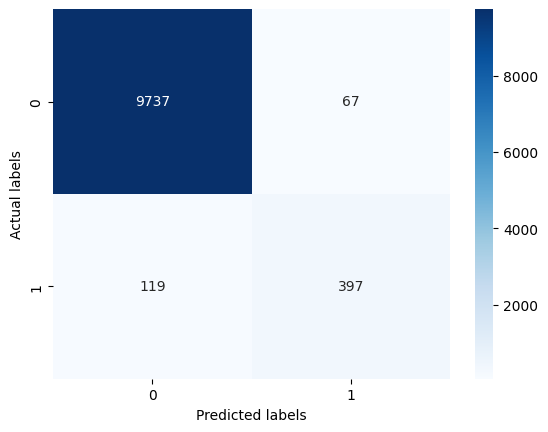

In [ ]:
actual_labels = submission22['Kemiripan']  # Replace 'actual_column_name' with your actual column name
predicted_labels = submission22['predict']

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(actual_labels, predicted_labels)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.show()

In [ ]:
df = submission22

# Menambahkan kolom baru 'C' sesuai aturan yang diberikan
df['koreksi'] = (df['Kemiripan'] == '1.0') & (df['predict'] == '1.0')

# Mengganti nilai True/False dengan 1/0
df['koreksi'] = df['koreksi'].astype(int)

# Mengurutkan DataFrame berdasarkan kolom 'C' secara descending
df = df.sort_values(by='koreksi', ascending=False)
df = df.astype(str)

In [ ]:
import pandas as pd

#df = submission31

# List of row counts to consider
row_counts = [5, 10, 20]

# Dictionary to store MRR values for different row counts
mrr_values_dict = {}

for count in row_counts:
    mrr_values = []
    for kasus in df['Kasus'].unique():
        group = df[df['Kasus'] == kasus].head(count)  # Select the top 'count' rows for each 'Kasus'
        reciprocal_rank = 0
        rank = 1
        rr_values = []
        for prediction in group['koreksi']:
            if prediction == '1':
                reciprocal_rank = 1 / rank  # Calculate reciprocal rank
                rank += 1
            elif prediction == '0':
                reciprocal_rank = 0  # Calculate reciprocal rank
                rank += 1
            rr_values.append(reciprocal_rank)
        mrr = sum(rr_values) / len(rr_values)
        mrr_values.append(mrr)

    mrr_values_dict[f'Top {count} Rows'] = mrr_values

# Print MRR values for different row counts
for key, mrr_values in mrr_values_dict.items():
    print(f"Reciprocal Ranks for each Kasus ({key}):")
    mrr_df = pd.DataFrame({'Kasus': df['Kasus'].unique(), 'MRR': mrr_values})
    #print(mrr_df)
    print(f"Average MRR ({key}):", sum(mrr_values) / len(mrr_values))
    print()

Reciprocal Ranks for each Kasus (Top 5 Rows):
Average MRR (Top 5 Rows): 0.15378640776699143

Reciprocal Ranks for each Kasus (Top 10 Rows):
Average MRR (Top 10 Rows): 0.07689320388349571

Reciprocal Ranks for each Kasus (Top 20 Rows):
Average MRR (Top 20 Rows): 0.03845171180378158



## Kernel 4

In [ ]:
# Define input shapes
input_q1 = Input(shape=(MAX_SEQUENCE_LENGTH,))
input_q2 = Input(shape=(MAX_SEQUENCE_LENGTH,))

# Define the embedding layer (using pre-trained Word2Vec embeddings)
embedding_layer = Embedding(input_dim=nb_words,
                            output_dim=EMBEDDING_DIM,
                            weights=[embeddings],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

# Apply the embedding layer to the input sequences
embedded_sequences_q1 = embedding_layer(input_q1)
embedded_sequences_q2 = embedding_layer(input_q2)

# Define Convolutional layers
num_filters = 258
kernel_size = 4
conv_layer = Conv1D(filters=num_filters, kernel_size=kernel_size, activation='relu')

# Apply Convolutional layers to the embedded sequences
x1 = conv_layer(embedded_sequences_q1)
x2 = conv_layer(embedded_sequences_q2)

# Apply Global Max Pooling to reduce the dimensionality
x1 = GlobalMaxPooling1D()(x1)
x2 = GlobalMaxPooling1D()(x2)

cosine_similarity = Lambda(cosine_distance)([x1, x2])

# Add a dense layer for similarity scoring
#dense_layer = Dense(64, activation='relu')(cosine_similarity)

# Add an output layer with a single unit and sigmoid activation for binary classification
output = Dense(1, activation='sigmoid')(cosine_similarity)

# Define the Siamese model
model23 = Model(inputs=[input_q1, input_q2], outputs=output)

# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.05)
model23.compile(loss='binary_crossentropy',
                      optimizer=opt,
                      metrics=['accuracy', Precision(), Recall()])

# Display model summary
model23.summary()
utils.plot_model(model23, show_shapes=True, expand_nested=True)
cp23=ModelCheckpoint('/content/gdrive/MyDrive/Tesis/0.05/model_cnn_f_train_20ep_4.hdf5',monitor='val_acc',verbose=1,save_best_only=False)

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_13 (InputLayer)       [(None, 30)]                 0         []                            
                                                                                                  
 input_14 (InputLayer)       [(None, 30)]                 0         []                            
                                                                                                  
 embedding_6 (Embedding)     (None, 30, 100)              2726000   ['input_13[0][0]',            
                                                                     'input_14[0][0]']            
                                                                                                  
 conv1d_2 (Conv1D)           (None, 27, 258)              103458    ['embedding_6[0][0]',   

In [ ]:
history_f_cnn = model23.fit(
    [X_q1, X_q2], y_train,
    validation_data=([X_val_q1, X_val_q2], y_val),
    batch_size=32,
    epochs=20,
    callbacks=[cp23]
)

Epoch 1/20
2578/2578 [==============================] - ETA: 0s - loss: 0.0990 - accuracy: 0.9671 - precision_6: 0.7851 - recall_6: 0.4721
Epoch 1: saving model to /content/gdrive/MyDrive/Tesis/0.05/model_cnn_f_train_20ep_4.hdf5
2578/2578 [==============================] - 19s 7ms/step - loss: 0.0990 - accuracy: 0.9671 - precision_6: 0.7851 - recall_6: 0.4721 - val_loss: 0.0737 - val_accuracy: 0.9747 - val_precision_6: 0.8848 - val_recall_6: 0.5670
Epoch 2/20
  21/2578 [..............................] - ETA: 13s - loss: 0.0663 - accuracy: 0.9762 - precision_6: 0.9200 - recall_6: 0.6216

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2570/2578 [============================>.] - ETA: 0s - loss: 0.0563 - accuracy: 0.9799 - precision_6: 0.8772 - recall_6: 0.6953
Epoch 2: saving model to /content/gdrive/MyDrive/Tesis/0.05/model_cnn_f_train_20ep_4.hdf5
2578/2578 [==============================] - 18s 7ms/step - loss: 0.0563 - accuracy: 0.9799 - precision_6: 0.8770 - recall_6: 0.6952 - val_loss: 0.0578 - val_accuracy: 0.9797 - val_precision_6: 0.8558 - val_recall_6: 0.7146
Epoch 3/20
2571/2578 [============================>.] - ETA: 0s - loss: 0.0504 - accuracy: 0.9811 - precision_6: 0.8795 - recall_6: 0.7206
Epoch 3: saving model to /content/gdrive/MyDrive/Tesis/0.05/model_cnn_f_train_20ep_4.hdf5
2578/2578 [==============================] - 18s 7ms/step - loss: 0.0503 - accuracy: 0.9811 - precision_6: 0.8799 - recall_6: 0.7211 - val_loss: 0.0517 - val_accuracy: 0.9809 - val_precision_6: 0.8533 - val_recall_6: 0.7456
Epoch 4/20
2573/2578 [============================>.] - ETA: 0s - loss: 0.0465 - accuracy: 0.9822 - preci

In [ ]:
y_pred_test = model23.predict([X_test_q1,X_test_q2])
threshold = 0.5
submission23 = test.copy()
submission23['Kemiripan'] = submission23['Kemiripan'].astype('float32')
submission23['predict'] = y_pred_test
submission23['predict'] = submission23['predict'].map(lambda x: 1.0 if x > threshold else 0.0)
submission23.to_csv('/content/gdrive/MyDrive/Tesis/0.05/submission_f_cnn_4.csv',index=False)

323/323 [==============================] - 1s 2ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
print('Model Metrics for FastText+CNN 20 Epoch 4')
print('---------------------------')
print(classification_report(submission23['Kemiripan'],submission23['predict']))
print('---------------------------')

Model Metrics for FastText+CNN 20 Epoch 4
---------------------------
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      9804
         1.0       0.80      0.76      0.78       516

    accuracy                           0.98     10320
   macro avg       0.90      0.87      0.88     10320
weighted avg       0.98      0.98      0.98     10320

---------------------------


In [ ]:
# Assign values to Accuracy column based on conditions
submission23['Accuracy'] = (submission23['Kemiripan'] == submission23['predict']).astype(int)

# Calculate overall accuracy
overall_accuracy = submission23['Accuracy'].mean()

print("Overall Accuracy:", overall_accuracy)

Overall Accuracy: 0.9785852713178295


In [ ]:
submission23 = pd.read_csv('/content/gdrive/MyDrive/Tesis/0.05/submission_f_cnn_4.csv')
submission23 = submission23.astype(str)

## Kernel 5

In [ ]:
# Define input shapes
input_q1 = Input(shape=(MAX_SEQUENCE_LENGTH,))
input_q2 = Input(shape=(MAX_SEQUENCE_LENGTH,))

# Define the embedding layer (using pre-trained Word2Vec embeddings)
embedding_layer = Embedding(input_dim=nb_words,
                            output_dim=EMBEDDING_DIM,
                            weights=[embeddings],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

# Apply the embedding layer to the input sequences
embedded_sequences_q1 = embedding_layer(input_q1)
embedded_sequences_q2 = embedding_layer(input_q2)

# Define Convolutional layers
num_filters = 258
kernel_size = 5
conv_layer = Conv1D(filters=num_filters, kernel_size=kernel_size, activation='relu')

# Apply Convolutional layers to the embedded sequences
x1 = conv_layer(embedded_sequences_q1)
x2 = conv_layer(embedded_sequences_q2)

# Apply Global Max Pooling to reduce the dimensionality
x1 = GlobalMaxPooling1D()(x1)
x2 = GlobalMaxPooling1D()(x2)

cosine_similarity = Lambda(cosine_distance)([x1, x2])

# Add a dense layer for similarity scoring
#dense_layer = Dense(64, activation='relu')(cosine_similarity)

# Add an output layer with a single unit and sigmoid activation for binary classification
output = Dense(1, activation='sigmoid')(cosine_similarity)

# Define the Siamese model
model24 = Model(inputs=[input_q1, input_q2], outputs=output)

# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.05)
model24.compile(loss='binary_crossentropy',
                      optimizer=opt,
                      metrics=['accuracy', Precision(), Recall()])

# Display model summary
model24.summary()
utils.plot_model(model24, show_shapes=True, expand_nested=True)
cp24=ModelCheckpoint('/content/gdrive/MyDrive/Tesis/0.05/model_cnn_f_train_20ep_5.hdf5',monitor='val_acc',verbose=1,save_best_only=False)

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_15 (InputLayer)       [(None, 30)]                 0         []                            
                                                                                                  
 input_16 (InputLayer)       [(None, 30)]                 0         []                            
                                                                                                  
 embedding_7 (Embedding)     (None, 30, 100)              2726000   ['input_15[0][0]',            
                                                                     'input_16[0][0]']            
                                                                                                  
 conv1d_3 (Conv1D)           (None, 26, 258)              129258    ['embedding_7[0][0]',   

In [ ]:
history_f_cnn = model24.fit(
    [X_q1, X_q2], y_train,
    validation_data=([X_val_q1, X_val_q2], y_val),
    batch_size=32,
    epochs=20,
    callbacks=[cp24]
)

Epoch 1/20
2578/2578 [==============================] - ETA: 0s - loss: 0.1010 - accuracy: 0.9661 - precision_7: 0.7640 - recall_7: 0.4656
Epoch 1: saving model to /content/gdrive/MyDrive/Tesis/0.05/model_cnn_f_train_20ep_5.hdf5
2578/2578 [==============================] - 19s 7ms/step - loss: 0.1010 - accuracy: 0.9661 - precision_7: 0.7640 - recall_7: 0.4656 - val_loss: 0.0682 - val_accuracy: 0.9725 - val_precision_7: 0.7479 - val_recall_7: 0.6796
Epoch 2/20
  15/2578 [..............................] - ETA: 19s - loss: 0.0607 - accuracy: 0.9750 - precision_7: 0.7619 - recall_7: 0.6957

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2571/2578 [============================>.] - ETA: 0s - loss: 0.0617 - accuracy: 0.9767 - precision_7: 0.8478 - recall_7: 0.6508
Epoch 2: saving model to /content/gdrive/MyDrive/Tesis/0.05/model_cnn_f_train_20ep_5.hdf5
2578/2578 [==============================] - 18s 7ms/step - loss: 0.0616 - accuracy: 0.9767 - precision_7: 0.8481 - recall_7: 0.6513 - val_loss: 0.0591 - val_accuracy: 0.9773 - val_precision_7: 0.8707 - val_recall_7: 0.6408
Epoch 3/20
2575/2578 [============================>.] - ETA: 0s - loss: 0.0529 - accuracy: 0.9796 - precision_7: 0.8689 - recall_7: 0.6976
Epoch 3: saving model to /content/gdrive/MyDrive/Tesis/0.05/model_cnn_f_train_20ep_5.hdf5
2578/2578 [==============================] - 18s 7ms/step - loss: 0.0529 - accuracy: 0.9796 - precision_7: 0.8684 - recall_7: 0.6976 - val_loss: 0.0546 - val_accuracy: 0.9795 - val_precision_7: 0.8333 - val_recall_7: 0.7379
Epoch 4/20
2574/2578 [============================>.] - ETA: 0s - loss: 0.0470 - accuracy: 0.9814 - preci

In [ ]:
from tensorflow.keras.models import load_model

# load model
model24 = load_model('/content/gdrive/MyDrive/Tesis/0.05/model_cnn_f_train_20ep_5.hdf5')

In [ ]:
y_pred_test = model24.predict([X_test_q1,X_test_q2])
threshold = 0.5
submission24 = test.copy()
submission24['Kemiripan'] = submission24['Kemiripan'].astype('float32')
submission24['predict'] = y_pred_test
submission24['predict'] = submission24['predict'].map(lambda x: 1.0 if x > threshold else 0.0)
submission24.to_csv('/content/gdrive/MyDrive/Tesis/0.05/submission_f_cnn_5.csv',index=False)

323/323 [==============================] - 4s 10ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
print('Model Metrics for FastText+CNN 20 Epoch 5')
print('---------------------------')
print(classification_report(submission24['Kemiripan'],submission24['predict']))
print('---------------------------')

Model Metrics for FastText+CNN 20 Epoch 5
---------------------------
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      9804
         1.0       0.84      0.75      0.79       516

    accuracy                           0.98     10320
   macro avg       0.92      0.87      0.89     10320
weighted avg       0.98      0.98      0.98     10320

---------------------------


In [ ]:
# Assign values to Accuracy column based on conditions
submission24['Accuracy'] = (submission24['Kemiripan'] == submission24['predict']).astype(int)

# Calculate overall accuracy
overall_accuracy = submission24['Accuracy'].mean()

print("Overall Accuracy:", overall_accuracy)

Overall Accuracy: 0.9805232558139535


In [ ]:
submission24 = pd.read_csv('/content/gdrive/MyDrive/Tesis/0.05/submission_f_cnn_5.csv')
submission24 = submission24.astype(str)

# CNN-BiLSTM

## Kernel 2 DropOut 0.2

In [ ]:
from tensorflow.keras.layers import concatenate

In [ ]:
# Define input shapes
input_q1 = Input(shape=(MAX_SEQUENCE_LENGTH,))
input_q2 = Input(shape=(MAX_SEQUENCE_LENGTH,))

# Define the embedding layer (using pre-trained Word2Vec embeddings)
embedding_layer = Embedding(input_dim=nb_words,
                            output_dim=EMBEDDING_DIM,
                            weights=[embeddings],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

# Apply the embedding layer to the input sequences
embedded_sequences_q1 = embedding_layer(input_q1)
embedded_sequences_q2 = embedding_layer(input_q2)

# Define Convolutional layers
num_filters = 258
kernel_size = 2
conv_layer = Conv1D(filters=num_filters, kernel_size=kernel_size, activation='relu')

# Apply Convolutional layers to the embedded sequences
x1 = conv_layer(embedded_sequences_q1)
x2 = conv_layer(embedded_sequences_q2)

# Define the LSTM layers (you can experiment with the number of units)
lstm_units = 258
lstm_layer = Bidirectional(LSTM(lstm_units, return_sequences=False))

# Apply LSTM layers to the embedded sequences
x1 = lstm_layer(x1)
x1 = Dropout(0.2)(x1)
x2 = lstm_layer(x2)
x2 = Dropout(0.2)(x2)

cosine_similarity = Lambda(cosine_distance)([x1, x2])

# Add a dense layer for similarity scoring
#dense_layer = Dense(64, activation='relu')(cosine_similarity)

# Add an output layer with a single unit and sigmoid activation for binary classification
output = Dense(1, activation='sigmoid')(cosine_similarity)

# Define the Siamese model
model31 = Model(inputs=[input_q1, input_q2], outputs=output)

# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.05)
model31.compile(loss='binary_crossentropy',
                      optimizer=opt,
                      metrics=['accuracy', Precision(), Recall()])

# Display model summary
model31.summary()
utils.plot_model(model31, show_shapes=True, expand_nested=True)
cp31=ModelCheckpoint('/content/gdrive/MyDrive/Tesis/0.05/model_cnn-bilstm_f_train_20ep_2_02.hdf5',monitor='val_acc',verbose=1,save_best_only=False)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 30)]                 0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 30)]                 0         []                            
                                                                                                  
 embedding (Embedding)       (None, 30, 100)              2726000   ['input_1[0][0]',             
                                                                     'input_2[0][0]']             
                                                                                                  
 conv1d (Conv1D)             (None, 29, 258)              51858     ['embedding[0][0]',       

In [ ]:
history_f_cnnbilstm = model31.fit(
    [X_q1, X_q2], y_train,
    validation_data=([X_val_q1, X_val_q2], y_val),
    batch_size=32,
    epochs=20,
    callbacks=[cp31]
)

Epoch 1/20
2578/2578 [==============================] - ETA: 0s - loss: 0.2009 - accuracy: 0.9466 - precision: 0.0749 - recall: 0.0061
Epoch 1: saving model to /content/gdrive/MyDrive/Tesis/0.05/model_cnn-bilstm_f_train_20ep_2_02.hdf5
2578/2578 [==============================] - 68s 17ms/step - loss: 0.2009 - accuracy: 0.9466 - precision: 0.0749 - recall: 0.0061 - val_loss: 0.1991 - val_accuracy: 0.9500 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/20
2576/2578 [============================>.] - ETA: 0s - loss: 0.1936 - accuracy: 0.9500 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 2: saving model to /content/gdrive/MyDrive/Tesis/0.05/model_cnn-bilstm_f_train_20ep_2_02.hdf5
2578/2578 [==============================] - 43s 17ms/step - loss: 0.1935 - accuracy: 0.9500 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.1945 - val_accuracy: 0.9500 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/20
2578/2578 [==============================] - ETA: 0s - loss: 0.1933 - accuracy: 0.9500 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 3: saving model to /content/gdrive/MyDrive/Tesis/0.05/model_cnn-bilstm_f_train_20ep_2_02.hdf5
2578/2578 [==============================] - 42s 16ms/step - loss: 0.1933 - accuracy: 0.9500 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.2014 - val_accuracy: 0.9500 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/20
2577/2578 [==========================

In [ ]:
y_pred_test = model31.predict([X_test_q1,X_test_q2])
threshold = 0.5
submission31 = test.copy()
submission31['Kemiripan'] = submission31['Kemiripan'].astype('float32')
submission31['predict'] = y_pred_test
submission31['predict'] = submission31['predict'].map(lambda x: 1.0 if x > threshold else 0.0)
submission31.to_csv('/content/gdrive/MyDrive/Tesis/0.05/submission_f_cnnbilstm_2_02.csv',index=False)

323/323 [==============================] - 3s 6ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
print('Model Metrics for FastText+CNN-BiLSTM 20 Epoch 2 0.2')
print('---------------------------')
print(classification_report(submission31['Kemiripan'],submission31['predict']))
print('---------------------------')

Model Metrics for FastText+CNN-BiLSTM 20 Epoch 2 0.2
---------------------------
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      9804
         1.0       0.00      0.00      0.00       516

    accuracy                           0.95     10320
   macro avg       0.47      0.50      0.49     10320
weighted avg       0.90      0.95      0.93     10320

---------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Assign values to Accuracy column based on conditions
submission31['Accuracy'] = (submission31['Kemiripan'] == submission31['predict']).astype(int)

# Calculate overall accuracy
overall_accuracy = submission31['Accuracy'].mean()

print("Overall Accuracy:", overall_accuracy)

Overall Accuracy: 0.95


In [ ]:
submission31 = pd.read_csv('/content/gdrive/MyDrive/Tesis/0.05/submission_f_cnnbilstm_2_02.csv')
submission31 = submission31.astype(str)

## Kernel 3 DropOut 0.3

In [ ]:
# Define input shapes
input_q1 = Input(shape=(MAX_SEQUENCE_LENGTH,))
input_q2 = Input(shape=(MAX_SEQUENCE_LENGTH,))

# Define the embedding layer (using pre-trained Word2Vec embeddings)
embedding_layer = Embedding(input_dim=nb_words,
                            output_dim=EMBEDDING_DIM,
                            weights=[embeddings],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

# Apply the embedding layer to the input sequences
embedded_sequences_q1 = embedding_layer(input_q1)
embedded_sequences_q2 = embedding_layer(input_q2)

# Define Convolutional layers
num_filters = 258
kernel_size = 3
conv_layer = Conv1D(filters=num_filters, kernel_size=kernel_size, activation='relu')

# Apply Convolutional layers to the embedded sequences
x1 = conv_layer(embedded_sequences_q1)
x2 = conv_layer(embedded_sequences_q2)

# Define the LSTM layers (you can experiment with the number of units)
lstm_units = 258
lstm_layer = Bidirectional(LSTM(lstm_units, return_sequences=False))

# Apply LSTM layers to the embedded sequences
x1 = lstm_layer(x1)
x1 = Dropout(0.3)(x1)
x2 = lstm_layer(x2)
x2 = Dropout(0.3)(x2)

cosine_similarity = Lambda(cosine_distance)([x1, x2])

# Add a dense layer for similarity scoring
#dense_layer = Dense(64, activation='relu')(cosine_similarity)

# Add an output layer with a single unit and sigmoid activation for binary classification
output = Dense(1, activation='sigmoid')(cosine_similarity)

# Define the Siamese model
model32 = Model(inputs=[input_q1, input_q2], outputs=output)

# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.05)
model32.compile(loss='binary_crossentropy',
                      optimizer=opt,
                      metrics=['accuracy', Precision(), Recall()])

# Display model summary
model32.summary()
utils.plot_model(model32, show_shapes=True, expand_nested=True)
cp32=ModelCheckpoint('/content/gdrive/MyDrive/Tesis/0.05/model_cnn-bilstm_f_train_20ep_3_03.hdf5',monitor='val_acc',verbose=1,save_best_only=False)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 30)]                 0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 30)]                 0         []                            
                                                                                                  
 embedding_1 (Embedding)     (None, 30, 100)              2726000   ['input_3[0][0]',             
                                                                     'input_4[0][0]']             
                                                                                                  
 conv1d_1 (Conv1D)           (None, 28, 258)              77658     ['embedding_1[0][0]',   

In [ ]:
history_f_cnnbilstm = model32.fit(
    [X_q1, X_q2], y_train,
    validation_data=([X_val_q1, X_val_q2], y_val),
    batch_size=32,
    epochs=20,
    callbacks=[cp32]
)

Epoch 1/20
2578/2578 [==============================] - ETA: 0s - loss: 0.2004 - accuracy: 0.9500 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00
Epoch 1: saving model to /content/gdrive/MyDrive/Tesis/0.05/model_cnn-bilstm_f_train_20ep_3_03.hdf5
2578/2578 [==============================] - 46s 15ms/step - loss: 0.2004 - accuracy: 0.9500 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_loss: 0.2087 - val_accuracy: 0.9500 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 2/20
   1/2578 [..............................] - ETA: 1:06 - loss: 0.3316 - accuracy: 0.9062 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2578/2578 [==============================] - ETA: 0s - loss: 0.1994 - accuracy: 0.9500 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00
Epoch 2: saving model to /content/gdrive/MyDrive/Tesis/0.05/model_cnn-bilstm_f_train_20ep_3_03.hdf5
2578/2578 [==============================] - 39s 15ms/step - loss: 0.1994 - accuracy: 0.9500 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_loss: 0.2021 - val_accuracy: 0.9500 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 3/20
2577/2578 [============================>.] - ETA: 0s - loss: 0.1996 - accuracy: 0.9500 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00
Epoch 3: saving model to /content/gdrive/MyDrive/Tesis/0.05/model_cnn-bilstm_f_train_20ep_3_03.hdf5
2578/2578 [==============================] - 38s 15ms/step - loss: 0.1996 - accuracy: 0.9500 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_loss: 0.2032 - val_accuracy: 0.9500 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 4/20
2577/2578 [=============

In [ ]:
y_pred_test = model32.predict([X_test_q1,X_test_q2])
threshold = 0.5
submission32 = test.copy()
submission32['Kemiripan'] = submission32['Kemiripan'].astype('float32')
submission32['predict'] = y_pred_test
submission32['predict'] = submission32['predict'].map(lambda x: 1.0 if x > threshold else 0.0)
submission32.to_csv('/content/gdrive/MyDrive/Tesis/0.05/submission_f_cnnbilstm_3_03.csv',index=False)

323/323 [==============================] - 3s 6ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
print('Model Metrics for FastText+CNN-BiLSTM 20 Epoch 3 0.3')
print('---------------------------')
print(classification_report(submission32['Kemiripan'],submission32['predict']))
print('---------------------------')

Model Metrics for FastText+CNN-BiLSTM 20 Epoch 3 0.3
---------------------------
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      9804
         1.0       0.00      0.00      0.00       516

    accuracy                           0.95     10320
   macro avg       0.47      0.50      0.49     10320
weighted avg       0.90      0.95      0.93     10320

---------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Assign values to Accuracy column based on conditions
submission32['Accuracy'] = (submission32['Kemiripan'] == submission32['predict']).astype(int)

# Calculate overall accuracy
overall_accuracy = submission32['Accuracy'].mean()

print("Overall Accuracy:", overall_accuracy)

Overall Accuracy: 0.95


In [ ]:
submission32 = pd.read_csv('/content/gdrive/MyDrive/Tesis/0.05/submission_f_cnnbilstm_3_03.csv')
submission32 = submission32.astype(str)

## Kernel 4 DropOut 0.5

In [ ]:
# Define input shapes
input_q1 = Input(shape=(MAX_SEQUENCE_LENGTH,))
input_q2 = Input(shape=(MAX_SEQUENCE_LENGTH,))

# Define the embedding layer (using pre-trained Word2Vec embeddings)
embedding_layer = Embedding(input_dim=nb_words,
                            output_dim=EMBEDDING_DIM,
                            weights=[embeddings],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

# Apply the embedding layer to the input sequences
embedded_sequences_q1 = embedding_layer(input_q1)
embedded_sequences_q2 = embedding_layer(input_q2)

# Define Convolutional layers
num_filters = 258
kernel_size = 4
conv_layer = Conv1D(filters=num_filters, kernel_size=kernel_size, activation='relu')

# Apply Convolutional layers to the embedded sequences
x1 = conv_layer(embedded_sequences_q1)
x2 = conv_layer(embedded_sequences_q2)

# Define the LSTM layers (you can experiment with the number of units)
lstm_units = 258
lstm_layer = Bidirectional(LSTM(lstm_units, return_sequences=False))

# Apply LSTM layers to the embedded sequences
x1 = lstm_layer(x1)
x1 = Dropout(0.5)(x1)
x2 = lstm_layer(x2)
x2 = Dropout(0.5)(x2)

cosine_similarity = Lambda(cosine_distance)([x1, x2])

# Add a dense layer for similarity scoring
#dense_layer = Dense(64, activation='relu')(cosine_similarity)

# Add an output layer with a single unit and sigmoid activation for binary classification
output = Dense(1, activation='sigmoid')(cosine_similarity)

# Define the Siamese model
model33 = Model(inputs=[input_q1, input_q2], outputs=output)

# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.05)
model33.compile(loss='binary_crossentropy',
                      optimizer=opt,
                      metrics=['accuracy', Precision(), Recall()])

# Display model summary
model33.summary()
utils.plot_model(model33, show_shapes=True, expand_nested=True)
cp33=ModelCheckpoint('/content/gdrive/MyDrive/Tesis/0.05/model_cnn-bilstm_f_train_20ep_4_05.hdf5',monitor='val_acc',verbose=1,save_best_only=False)

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 30)]                 0         []                            
                                                                                                  
 input_6 (InputLayer)        [(None, 30)]                 0         []                            
                                                                                                  
 embedding_2 (Embedding)     (None, 30, 100)              2726000   ['input_5[0][0]',             
                                                                     'input_6[0][0]']             
                                                                                                  
 conv1d_2 (Conv1D)           (None, 27, 258)              103458    ['embedding_2[0][0]',   

In [ ]:
history_f_cnnbilstm = model33.fit(
    [X_q1, X_q2], y_train,
    validation_data=([X_val_q1, X_val_q2], y_val),
    batch_size=32,
    epochs=20,
    callbacks=[cp33]
)

Epoch 1/20
2578/2578 [==============================] - ETA: 0s - loss: 0.2014 - accuracy: 0.9500 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00
Epoch 1: saving model to /content/gdrive/MyDrive/Tesis/0.05/model_cnn-bilstm_f_train_20ep_4_05.hdf5
2578/2578 [==============================] - 52s 17ms/step - loss: 0.2014 - accuracy: 0.9500 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - val_loss: 0.2101 - val_accuracy: 0.9500 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 2/20
   6/2578 [..............................] - ETA: 30s - loss: 0.1883 - accuracy: 0.9531 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2575/2578 [============================>.] - ETA: 0s - loss: 0.1992 - accuracy: 0.9500 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00
Epoch 2: saving model to /content/gdrive/MyDrive/Tesis/0.05/model_cnn-bilstm_f_train_20ep_4_05.hdf5
2578/2578 [==============================] - 38s 15ms/step - loss: 0.1992 - accuracy: 0.9500 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - val_loss: 0.2098 - val_accuracy: 0.9500 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 3/20
2577/2578 [============================>.] - ETA: 0s - loss: 0.1994 - accuracy: 0.9500 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00
Epoch 3: saving model to /content/gdrive/MyDrive/Tesis/0.05/model_cnn-bilstm_f_train_20ep_4_05.hdf5
2578/2578 [==============================] - 40s 16ms/step - loss: 0.1994 - accuracy: 0.9500 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - val_loss: 0.2003 - val_accuracy: 0.9500 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 4/20
2575/2578 [=============

In [ ]:
y_pred_test = model33.predict([X_test_q1,X_test_q2])
threshold = 0.5
submission33 = test.copy()
submission33['Kemiripan'] = submission33['Kemiripan'].astype('float32')
submission33['predict'] = y_pred_test
submission33['predict'] = submission33['predict'].map(lambda x: 1.0 if x > threshold else 0.0)
submission33.to_csv('/content/gdrive/MyDrive/Tesis/0.05/submission_f_cnnbilstm_4_05.csv',index=False)

323/323 [==============================] - 4s 8ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
print('Model Metrics for FastText+CNN-BiLSTM 20 Epoch 4 0.5')
print('---------------------------')
print(classification_report(submission33['Kemiripan'],submission33['predict']))
print('---------------------------')

Model Metrics for FastText+CNN-BiLSTM 20 Epoch 4 0.5
---------------------------
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      9804
         1.0       0.00      0.00      0.00       516

    accuracy                           0.95     10320
   macro avg       0.47      0.50      0.49     10320
weighted avg       0.90      0.95      0.93     10320

---------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Assign values to Accuracy column based on conditions
submission33['Accuracy'] = (submission33['Kemiripan'] == submission33['predict']).astype(int)

# Calculate overall accuracy
overall_accuracy = submission33['Accuracy'].mean()

print("Overall Accuracy:", overall_accuracy)

Overall Accuracy: 0.95


In [ ]:
submission33 = pd.read_csv('/content/gdrive/MyDrive/Tesis/0.05/submission_f_cnnbilstm_4_05.csv')
submission33 = submission33.astype(str)

## Kernel 5 DropOut 0.7

In [ ]:
# Define input shapes
input_q1 = Input(shape=(MAX_SEQUENCE_LENGTH,))
input_q2 = Input(shape=(MAX_SEQUENCE_LENGTH,))

# Define the embedding layer (using pre-trained Word2Vec embeddings)
embedding_layer = Embedding(input_dim=nb_words,
                            output_dim=EMBEDDING_DIM,
                            weights=[embeddings],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

# Apply the embedding layer to the input sequences
embedded_sequences_q1 = embedding_layer(input_q1)
embedded_sequences_q2 = embedding_layer(input_q2)

# Define Convolutional layers
num_filters = 258
kernel_size = 5
conv_layer = Conv1D(filters=num_filters, kernel_size=kernel_size, activation='relu')

# Apply Convolutional layers to the embedded sequences
x1 = conv_layer(embedded_sequences_q1)
x2 = conv_layer(embedded_sequences_q2)

# Define the LSTM layers (you can experiment with the number of units)
lstm_units = 258
lstm_layer = Bidirectional(LSTM(lstm_units, return_sequences=False))

# Apply LSTM layers to the embedded sequences
x1 = lstm_layer(x1)
x1 = Dropout(0.7)(x1)
x2 = lstm_layer(x2)
x2 = Dropout(0.7)(x2)

cosine_similarity = Lambda(cosine_distance)([x1, x2])

# Add a dense layer for similarity scoring
#dense_layer = Dense(64, activation='relu')(cosine_similarity)

# Add an output layer with a single unit and sigmoid activation for binary classification
output = Dense(1, activation='sigmoid')(cosine_similarity)

# Define the Siamese model
model34 = Model(inputs=[input_q1, input_q2], outputs=output)

# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.05)
model34.compile(loss='binary_crossentropy',
                      optimizer=opt,
                      metrics=['accuracy', Precision(), Recall()])

# Display model summary
model34.summary()
utils.plot_model(model34, show_shapes=True, expand_nested=True)
cp34=ModelCheckpoint('/content/gdrive/MyDrive/Tesis/0.05/model_cnn-bilstm_f_train_20ep_5_07.hdf5',monitor='val_acc',verbose=1,save_best_only=False)

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 30)]                 0         []                            
                                                                                                  
 input_8 (InputLayer)        [(None, 30)]                 0         []                            
                                                                                                  
 embedding_3 (Embedding)     (None, 30, 100)              2726000   ['input_7[0][0]',             
                                                                     'input_8[0][0]']             
                                                                                                  
 conv1d_3 (Conv1D)           (None, 26, 258)              129258    ['embedding_3[0][0]',   

In [ ]:
history_f_cnnbilstm = model34.fit(
    [X_q1, X_q2], y_train,
    validation_data=([X_val_q1, X_val_q2], y_val),
    batch_size=32,
    epochs=20,
    callbacks=[cp34]
)

Epoch 1/20
2577/2578 [============================>.] - ETA: 0s - loss: 0.2012 - accuracy: 0.9486 - precision_3: 0.0400 - recall_3: 0.0012
Epoch 1: saving model to /content/gdrive/MyDrive/Tesis/0.05/model_cnn-bilstm_f_train_20ep_5_07.hdf5
2578/2578 [==============================] - 49s 16ms/step - loss: 0.2012 - accuracy: 0.9486 - precision_3: 0.0400 - recall_3: 0.0012 - val_loss: 0.3500 - val_accuracy: 0.9500 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 2/20
   5/2578 [..............................] - ETA: 32s - loss: 0.1975 - accuracy: 0.9500 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2575/2578 [============================>.] - ETA: 0s - loss: 0.1962 - accuracy: 0.9500 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00
Epoch 2: saving model to /content/gdrive/MyDrive/Tesis/0.05/model_cnn-bilstm_f_train_20ep_5_07.hdf5
2578/2578 [==============================] - 39s 15ms/step - loss: 0.1962 - accuracy: 0.9500 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00 - val_loss: 0.3349 - val_accuracy: 0.9500 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 3/20
2577/2578 [============================>.] - ETA: 0s - loss: 0.1966 - accuracy: 0.9500 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00
Epoch 3: saving model to /content/gdrive/MyDrive/Tesis/0.05/model_cnn-bilstm_f_train_20ep_5_07.hdf5
2578/2578 [==============================] - 41s 16ms/step - loss: 0.1966 - accuracy: 0.9500 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00 - val_loss: 0.6021 - val_accuracy: 0.5183 - val_precision_3: 0.0683 - val_recall_3: 0.6835
Epoch 4/20
2576/2578 [=====================

In [ ]:
y_pred_test = model34.predict([X_test_q1,X_test_q2])
threshold = 0.5
submission34 = test.copy()
submission34['Kemiripan'] = submission34['Kemiripan'].astype('float32')
submission34['predict'] = y_pred_test
submission34['predict'] = submission34['predict'].map(lambda x: 1.0 if x > threshold else 0.0)
submission34.to_csv('/content/gdrive/MyDrive/Tesis/0.05/submission_f_cnnbilstm_5_07.csv',index=False)

323/323 [==============================] - 3s 5ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
print('Model Metrics for FastText+CNN-BiLSTM 20 Epoch 5 0.7')
print('---------------------------')
print(classification_report(submission34['Kemiripan'],submission34['predict']))
print('---------------------------')

Model Metrics for FastText+CNN-BiLSTM 20 Epoch 5 0.7
---------------------------
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      9804
         1.0       0.00      0.00      0.00       516

    accuracy                           0.95     10320
   macro avg       0.47      0.50      0.49     10320
weighted avg       0.90      0.95      0.93     10320

---------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Assign values to Accuracy column based on conditions
submission34['Accuracy'] = (submission34['Kemiripan'] == submission34['predict']).astype(int)

# Calculate overall accuracy
overall_accuracy = submission34['Accuracy'].mean()

print("Overall Accuracy:", overall_accuracy)

Overall Accuracy: 0.95


In [ ]:
submission34 = pd.read_csv('/content/gdrive/MyDrive/Tesis/0.05/submission_f_cnnbilstm_5_07.csv')
submission34 = submission34.astype(str)